# Turkish international trade analysis
<p>
    The analysis aims to provide a general overview of the state of Türkiye's international trade. I've decided to rely on Python as a main tool. Thus, the entire analysis is inside this notebook. The entire data is split into 2 datasets: export and import. Values are presented in US$1000 units.
</p>
<p>
    Table of contents:
    <ol>
        <li>Data general overview, cleaning/preparation</li>
        <li>Annual data analysis</li>
        <li>Last year analysis by countries</li>
    </ol>
</p>
<p>Data source: <a href="https://data.tuik.gov.tr">https://data.tuik.gov.tr</a>

## 1. Data general overview, cleaning/preparation

### Overview

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing export dataset
dfe = pd.read_excel('export_by_countries_2023_03.xls')
#importing import dataset
dfi = pd.read_excel('import_by_countries_2023_03.xls')

#show information about columns and its data types
print(dfe.shape, dfi.shape, '\n')
print(dfe.info(), dfi.info(), sep = '\n')
print(dfe.describe().round(2), dfi.describe().round(2), sep = '\n')

(2461, 16) (2421, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        2461 non-null   int64  
 1   Unnamed: 1  2461 non-null   int64  
 2   Country     2461 non-null   object 
 3   Total       2461 non-null   float64
 4   January     2461 non-null   object 
 5   February    2461 non-null   object 
 6   March       2244 non-null   object 
 7   April       2244 non-null   object 
 8   May         2244 non-null   object 
 9   June        2244 non-null   object 
 10  July        2244 non-null   object 
 11  August      2244 non-null   object 
 12  September   2244 non-null   object 
 13  October     2244 non-null   object 
 14  November    2244 non-null   object 
 15  December    2244 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 307.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 

In [3]:
#show random 10 rows from import data to check what values occur
dfi.sample(10)

,Year,Unnamed: 1,Country,Total,January,February,March,April,May,June,July,August,September,October,November,December
431,2021,3,Netherlands,4508586.991,310200.782,422326.831,434600.878,455077.149,310982.152,381527.201,391286.24,319648.089,288374.469,285752.985,412646.193,496164.022
362,2022,612,Iraq,1419235.366,75510.641,86846.157,243391.948,132245.619,129017.941,116456.223,110230.216,144996.186,108829.903,91534.421,93888.618,86287.493
2282,2013,324,Rwanda,437.623,247.014,-,-,-,-,-,-,185.385,-,5.017,-,0.207
488,2021,220,Egypt,2211759.893,148002.408,179637.529,222940.061,183294.351,145180.472,173019.588,128573.871,184731.672,208443.251,178811.577,217789.262,241335.851
367,2022,628,Jordan,142850.620,13594.529,19509.093,2169.237,10955.58,24083.286,4383.87,2507.393,2777.253,7299.331,14201.33,21773.732,19595.986
1080,2019,838,Niue Island,92.503,14.439,10.441,6.716,6.468,11.611,7.93,-,31.586,0.346,-,0.417,2.549
990,2019,448,Cuba,20231.819,1172.344,1274.385,1667.307,1520.297,2124.649,1862.288,2087.435,2068.854,1873.555,1083.28,2150.982,1346.443
1176,2018,342,Somalia,6626.350,1227.683,-,552.616,1245.369,151.712,227.705,123.555,96.512,729.177,348.694,159.119,1764.208
87,2023,330,Angola,1079.991,551.051,528.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2023,264,Sierra Leone,592.647,462.133,130.514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#same as above but for export data
dfe.sample(10)

,Year,Unnamed: 1,Country,Total,January,February,March,April,May,June,July,August,September,October,November,December
1327,2018,800,Australia,704085.464,53479.563,61946.785,54903.549,52331.314,57072.218,53890.45,52126.835,55919.388,65765.721,65338.475,56733.485,74577.681
1398,2017,82,Tajikistan,166921.174,9716.658,13615.73,17377.601,14417.471,12299.559,10822.368,14361.331,15559.703,11402.775,15075.788,16134.183,16138.007
771,2020,355,Seychelles,17914.124,1214.221,3477.443,903.399,1030.708,659.273,577.261,877.347,913.267,307.027,6400.581,442.429,1111.168
1823,2015,54,Latvia,178880.314,7711.488,8718.873,11448.073,13225.532,9226.517,8585.228,12128.466,12501.002,25952.596,32720.062,20395.23,16267.247
1504,2017,520,Paraguay,32964.526,1726.216,1178.368,3581.893,4407.956,2122.126,3029.078,2470.261,3499.251,3012.243,1919.279,2553.036,3464.819
1377,2017,47,San Marino,157.771,-,-,6.406,-,-,-,7.021,-,-,7.116,137.228,-
698,2020,46,Malta,432449.231,70860.875,25829.053,20184.747,24326.562,42201.563,62367.568,20021.797,43922.784,30270.179,33352.174,31879.231,27232.698
933,2019,66,Romania,4073074.997,320599.885,344591.704,405242.986,325695.489,364979.844,297319.879,348963.038,277806.815,352727.608,391995.933,360592.729,282559.087
1009,2019,391,Botswana,2839.656,77.4,77.466,300.249,97.238,442.507,226.319,489.965,359.153,200.383,134.815,285.748,148.413
1986,2015,720,China,2500618.224,165577.283,152261.846,182309.465,213154.188,251767.146,283425.798,232752.023,213502.629,184924.753,190820.572,197521.996,232600.525


<br>
We see both <i><b>-</b></i> and <i><b>NaN<b></i> values. Datasets are from 2023.03 so in 2023 only the January and Fabruary data should be filled.<br>
Also there is the <b>Unnamed: 1</b> column which is the Country code (sort of ID) according to the TURKSTAT.
<br><br>

### Data preparation

In [5]:
#change 'Unnamed: 1' column name into 'Ccode'
for x in (dfe, dfi):
    x.rename(columns={'Unnamed: 1': 'Ccode'}, inplace = True)
print(dfe.columns.values, dfi.columns.values, sep = '\n')

['Year' 'Ccode' 'Country' 'Total' 'January' 'February' 'March' 'April'
 'May' 'June' 'July' 'August' 'September' 'October' 'November' 'December']
['Year' 'Ccode' 'Country' 'Total' 'January' 'February' 'March' 'April'
 'May' 'June' 'July' 'August' 'September' 'October' 'November' 'December']


In [6]:
#check columns with NaN
dfi[dfi.columns[dfi.isna().any()]]

,March,April,May,June,July,August,September,October,November,December
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2416,0.95,-,-,-,-,-,-,-,-,-
2417,-,0.941,-,-,-,-,-,-,-,-
2418,-,27.54,2.618,-,-,-,-,-,-,-
2419,4.766,155.467,29.41,4.627,34.926,9.009,28.547,43.319,14.336,286.901


NaN i only from March to December.

In [7]:
#Check years where NaN occur
dfi[dfi.isna().any(axis=1)]['Year'].unique()[0]

2023

So NaN is only from March 2023.

In [8]:
#Check data with '-'
dfi[dfi.isin(['-']).any(axis = 1)]

,Year,Ccode,Country,Total,January,February,March,April,May,June,July,August,September,October,November,December
21,2023,44,Gibraltar,0.308,-,0.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2023,45,Vatican City State,6.335,6.335,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,2023,225,South Sudan,0.408,-,0.408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,2023,236,Burkina Faso,35.863,35.863,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2023,247,Cape Verde,0.002,-,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,2013,838,Niue Island,257.490,26.105,21.541,0.592,0.119,4.275,19.23,7.165,27.4,7.385,-,142.149,1.529
2415,2013,839,Tokelau Islands,9.900,-,-,0.507,2.67,-,1.497,2.905,-,-,-,-,2.321
2416,2013,891,Antarctica,0.950,-,-,0.95,-,-,-,-,-,-,-,-,-
2417,2013,893,South Georgia and Sandwich. Isl.,0.941,-,-,-,0.941,-,-,-,-,-,-,-,-


In [9]:
dfi[dfi.isin(['-']).any(axis = 1)].sort_values('Total', ascending=False).head(5)

,Year,Ccode,Country,Total,January,February,March,April,May,June,July,August,September,October,November,December
2347,2013,520,Paraguay,292076.627,53,50.211,32.922,-,20276.231,61528.514,47960.589,46710.694,55071.798,32714.123,9933.51,17745.035
722,2020,260,Guinea,162016.667,2.28,-,1105.591,41883.424,57037.048,20818.009,40400.202,145.359,26.12,18.318,84.588,495.728
724,2020,268,Liberia,100209.136,4.21,-,527.415,14513.361,11928.002,13898.634,11249.839,12135.125,8825.212,12503.899,1300.866,13322.573
1369,2017,236,Burkina Faso,63835.120,911.18,-,5369.066,7429.052,10237.703,5373.102,9769.027,10610.956,11776.951,2343.805,0.124,14.154
415,2022,824,Marshall Islands,57619.724,-,-,-,716.72,1.177,-,4.892,14690,2.9,37105.75,5088.262,10.023


In [10]:
dfi[dfi.isin(['-']).any(axis = 1)].describe().round(2)

,Year,Ccode,Total
count,749.00,749.00,749.00
mean,2017.47,519.34,2802.89
std,2.96,242.41,14185.92
min,2013.00,21.00,0.00
25%,2015.00,338.00,5.12
50%,2017.00,464.00,62.28
75%,2020.00,809.00,937.92
max,2023.00,958.00,292076.63


<i><b>-</b></i> is in every year, every month but the 'Total' values suggest that it occurs only for relatively small trading partners<br>

In [11]:
#repeat the proccess for export data
#check for NaN values
dfe[dfe.columns[dfi.isna().any()]]

,March,April,May,June,July,August,September,October,November,December
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2456,-,-,-,-,-,-,112,-,-,-
2457,72.835,167.16,554.494,650.671,277.785,951.207,306.828,221.717,122.018,252.239
2458,-,-,-,-,-,-,3.959,-,-,-
2459,16.405,140.752,-,-,28.581,141.527,80.046,82.321,117.537,-


In [12]:
#Check years where NaN occur
dfe[dfe.isna().any(axis=1)]['Year'].unique()[0]

2023

In [13]:
#Check data with '-'
dfe[dfe.isin(['-']).any(axis = 1)]

,Year,Ccode,Country,Total,January,February,March,April,May,June,July,August,September,October,November,December
152,2023,529,Falkland Islands,19.871,-,19.871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,2023,675,Bhutan,0.113,0.113,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,2023,803,Nauru,0.024,0.024,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,2023,811,Vallis and Futuna,17.401,-,17.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,2023,817,Tonga,11.750,-,11.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,2013,830,American Samoa,222.228,16.433,5.561,1.894,-,4.653,19.696,76.009,-,-,7.091,78.011,12.88
2455,2013,832,USA Minor Outlying Islands,136.208,28.225,13.451,25.084,-,4.397,-,-,50.11,-,-,2.445,12.496
2456,2013,834,Christmas Islands,112.000,-,-,-,-,-,-,-,-,112,-,-,-
2458,2013,893,South Georgia and Sandwich. Isl.,3.959,-,-,-,-,-,-,-,-,3.959,-,-,-


In [14]:
dfe[dfe.isin(['-']).any(axis = 1)].sort_values('Total', ascending=False).head(5)

,Year,Ccode,Country,Total,January,February,March,April,May,June,July,August,September,October,November,December
1816,2015,41,Faroe Islands,121323.531,-,22183.451,23.869,-,22182.199,20.493,53671.141,-,2.82,22182.387,0.452,1056.719
1686,2016,406,Greenland,51481.004,-,-,-,58.545,-,-,-,-,17.8,-,7.198,51397.461
1663,2016,336,Eritrea,15665.988,16.919,-,167.423,8.675,4636.664,86.62,1524.05,4066.02,472.316,19.582,284.331,4383.388
991,2019,336,Eritrea,13933.353,4538.39,369.715,1853.501,308.937,434.422,-,1416.386,1429.565,1933.607,1625.469,16.781,6.58
1442,2017,336,Eritrea,13677.907,1529.036,2989.635,49.252,2984.401,6.407,-,24.224,4064.215,31.199,21.141,200.743,1777.654


In [15]:
dfe[dfe.isin(['-']).any(axis = 1)].describe().round(2)

,Year,Ccode,Total
count,336.00,336.00,336.00
mean,2017.39,567.07,1109.30
std,2.94,277.06,7335.07
min,2013.00,21.00,0.01
25%,2015.00,395.00,30.26
50%,2017.00,626.00,169.79
75%,2020.00,819.00,495.83
max,2023.00,894.00,121323.53


So both in dfi and dfe <i><b>NaN</i></b> is only from March 2023. <i><b>-</i></b> sign occur for smaller trading partners where in some month they might not have signifant/any trade.

In [16]:
#change - values to 0 in both datasets
dfe.replace(to_replace = '-', value = 0, inplace = True)
dfi.replace(to_replace = '-', value = 0, inplace = True)

In [17]:
#check if every Month-related values are numbers now
print(dfe.info(), dfi.info(), sep = '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       2461 non-null   int64  
 1   Ccode      2461 non-null   int64  
 2   Country    2461 non-null   object 
 3   Total      2461 non-null   float64
 4   January    2461 non-null   float64
 5   February   2461 non-null   float64
 6   March      2244 non-null   float64
 7   April      2244 non-null   float64
 8   May        2244 non-null   float64
 9   June       2244 non-null   float64
 10  July       2244 non-null   float64
 11  August     2244 non-null   float64
 12  September  2244 non-null   float64
 13  October    2244 non-null   float64
 14  November   2244 non-null   float64
 15  December   2244 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 307.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 16 columns):
 

<font size = 3>Data preparation seems to be finished</font>

## 2. Annual data analysis

To analyse annual data, both export and import should be grouped by the year.

In [18]:
#check both export and import include same years and number of years
for x in list(dfe[['Year', 'Total']].groupby(['Year']).sum().index.values):
    if x not in list(dfi[['Year', 'Total']].groupby(['Year']).sum().index.values):
        print(x + 'is not in import data\n')
for y in list(dfi[['Year', 'Total']].groupby(['Year']).sum().index.values):
    if y not in list(dfe[['Year', 'Total']].groupby(['Year']).sum().index.values):
        print(x + 'is not in export data\n')
print(len(list(dfe[['Year', 'Total']].groupby(['Year']).sum().index.values)) == len(list(dfi[['Year', 'Total']].groupby(['Year']).sum().index.values)))

True


Below grouped export and import data are merged. It's generally the same as this SQL query:<br>
<i>select * <br>
from (select * from export group by year) e <br>
full outer join on (select * from import group by year) i <br>
on e.Year = i.Year;</i>


In [19]:
#merged export and import by year preceded by grouping both datasets by year.
EI = pd.merge(dfe[['Year', 'Total']].groupby(['Year']).sum(), 
              dfi[['Year', 'Total']].groupby(['Year']).sum(),
              on = 'Year', 
              how = 'outer', suffixes = ('_E', '_I'))
EI

,Total_E,Total_I
Year,,
2013,1.614809e+08,2.608228e+08
2014,1.665049e+08,2.511424e+08
2015,1.509821e+08,2.136192e+08
2016,1.492470e+08,2.021892e+08
2017,1.644946e+08,2.387151e+08
2018,1.771688e+08,2.311525e+08
2019,1.808327e+08,2.103452e+08
2020,1.696378e+08,2.195168e+08
2021,2.252145e+08,2.714256e+08


In [20]:
#making new columns
EI['E+I'] = EI['Total_E']+EI['Total_I']
EI['E-I'] = EI['Total_E']-EI['Total_I']
EI['E/I'] = EI['Total_E']/EI['Total_I']
EI['E_2013'] = EI['Total_E']/(EI.loc[2013]['Total_E'])
EI['I_2013'] = EI['Total_I']/(EI.loc[2013]['Total_I'])
EI['E+I_2013'] = EI['E+I']/(EI.loc[2013]['E+I'])
EI

,Total_E,Total_I,E+I,E-I,E/I,E_2013,I_2013,E+I_2013
Year,,,,,,,,
2013,1.614809e+08,2.608228e+08,4.223037e+08,-9.934189e+07,0.619121,1.000000,1.000000,1.000000
2014,1.665049e+08,2.511424e+08,4.176473e+08,-8.463757e+07,0.662990,1.031112,0.962885,0.988974
2015,1.509821e+08,2.136192e+08,3.646013e+08,-6.263710e+07,0.706782,0.934984,0.819020,0.863363
2016,1.492470e+08,2.021892e+08,3.514362e+08,-5.294224e+07,0.738155,0.924239,0.775198,0.832188
2017,1.644946e+08,2.387151e+08,4.032097e+08,-7.422051e+07,0.689083,1.018663,0.915239,0.954786
2018,1.771688e+08,2.311525e+08,4.083212e+08,-5.398373e+07,0.766458,1.097150,0.886243,0.966890
2019,1.808327e+08,2.103452e+08,3.911779e+08,-2.951248e+07,0.859695,1.119840,0.806468,0.926295
2020,1.696378e+08,2.195168e+08,3.891546e+08,-4.987905e+07,0.772778,1.050513,0.841632,0.921504
2021,2.252145e+08,2.714256e+08,4.966400e+08,-4.621109e+07,0.829747,1.394682,1.040651,1.176026


In [21]:
#extracting only full years (in other words using all years except 2023th)
EI_f = EI[EI.index != 2023].copy()
EI_f

,Total_E,Total_I,E+I,E-I,E/I,E_2013,I_2013,E+I_2013
Year,,,,,,,,
2013,1.614809e+08,2.608228e+08,4.223037e+08,-9.934189e+07,0.619121,1.000000,1.000000,1.000000
2014,1.665049e+08,2.511424e+08,4.176473e+08,-8.463757e+07,0.662990,1.031112,0.962885,0.988974
2015,1.509821e+08,2.136192e+08,3.646013e+08,-6.263710e+07,0.706782,0.934984,0.819020,0.863363
2016,1.492470e+08,2.021892e+08,3.514362e+08,-5.294224e+07,0.738155,0.924239,0.775198,0.832188
2017,1.644946e+08,2.387151e+08,4.032097e+08,-7.422051e+07,0.689083,1.018663,0.915239,0.954786
2018,1.771688e+08,2.311525e+08,4.083212e+08,-5.398373e+07,0.766458,1.097150,0.886243,0.966890
2019,1.808327e+08,2.103452e+08,3.911779e+08,-2.951248e+07,0.859695,1.119840,0.806468,0.926295
2020,1.696378e+08,2.195168e+08,3.891546e+08,-4.987905e+07,0.772778,1.050513,0.841632,0.921504
2021,2.252145e+08,2.714256e+08,4.966400e+08,-4.621109e+07,0.829747,1.394682,1.040651,1.176026


### Export and import plots

In [22]:
#ax = EI_f.iloc[:, :-1].plot(figsize = (18,10), grid = True, xticks = EI.index, title = '')
#ax.legend(['Export', 'Import', 'Total trade'])

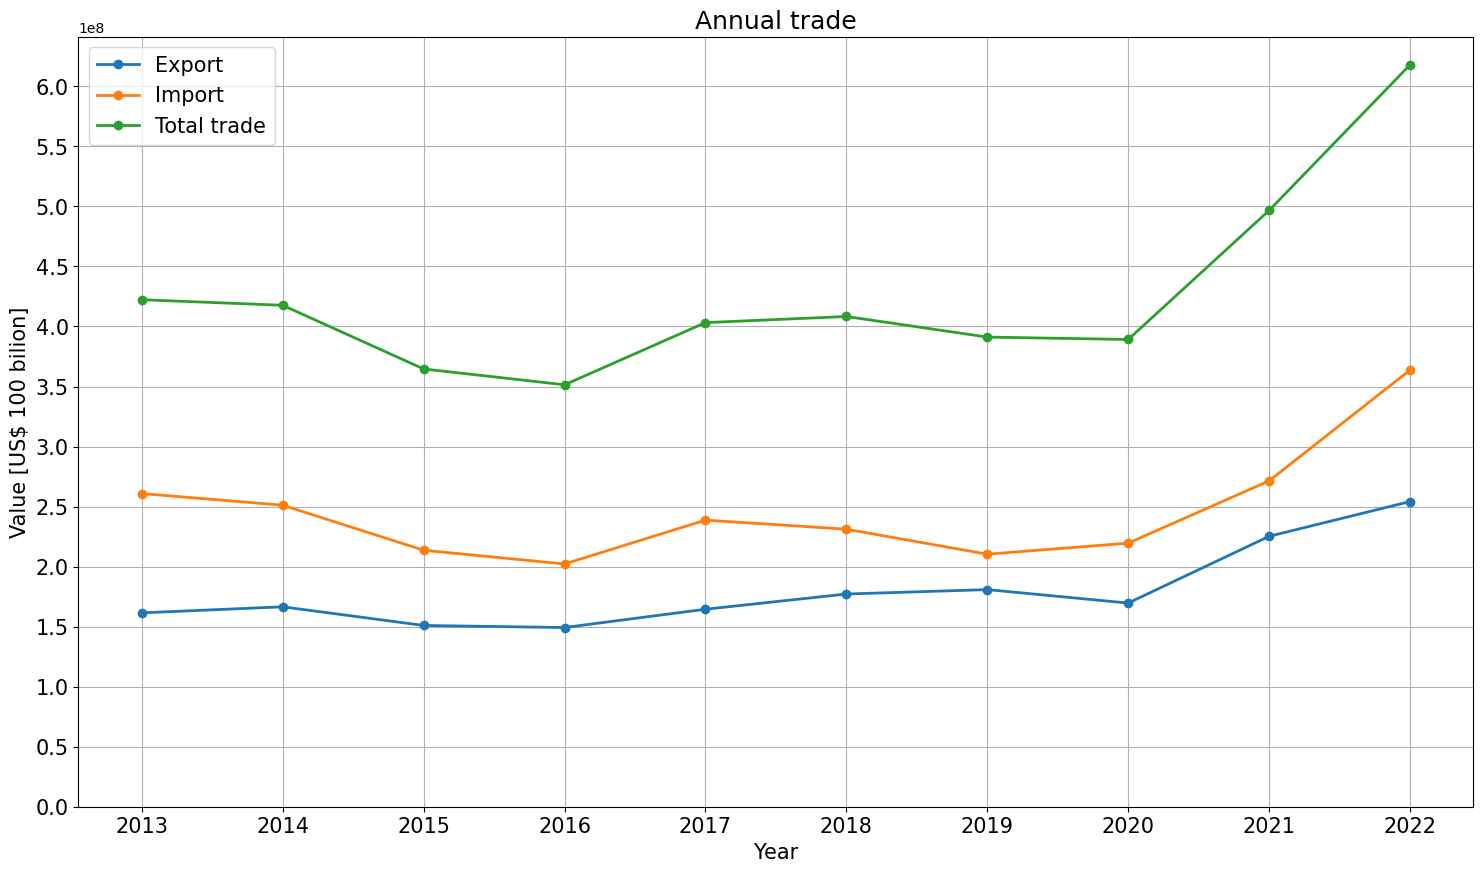

In [23]:
plt.figure(figsize = (18,10))
plt.plot(EI_f.index, EI_f['Total_E'], linestyle='-', marker='o', label = 'Export', linewidth = 2)
plt.plot(EI_f.index, EI_f['Total_I'], linestyle='-', marker='o', label = 'Import', linewidth = 2)
plt.plot(EI_f.index, EI_f['E+I'], linestyle='-', marker='o', label = 'Total trade', linewidth = 2)
plt.grid()
plt.title('Annual trade', fontsize = 18)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.ylabel(ylabel = 'Value [US$ 100 bilion]', fontsize = 15)
plt.xticks(ticks = EI_f.index, fontsize = 15)
plt.yticks(range(0, 62*10**7+1, 5*10**7), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Export was lower than import every year thus the annual balance was always negative.<br>
There was large increase of both import and export after 2020. Thus total trade value increased sharply. However import increased more than export.<br>
Before 2020 the export values were relatively stable and kept more smooth changes comparing to the import.

In [24]:
#EI_f.iloc[:, :-2].plot.bar(figsize = (18,10), stacked = True, title = 'Annual trade').legend(['Export', 'Import'])

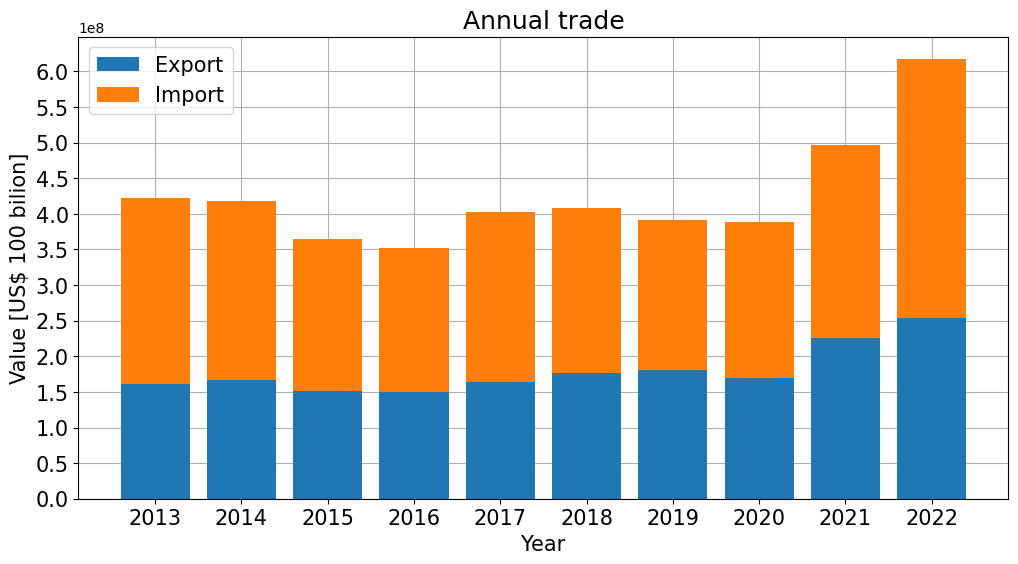

In [25]:
plt.figure(figsize = (12,6))
plt.bar(EI_f.index, EI_f['Total_E'], label = 'Export', color = 'tab:blue', zorder=2)
plt.bar(EI_f.index, EI_f['Total_I'], label = 'Import', bottom = EI_f['Total_E'], color = 'tab:orange', zorder=2)
plt.title('Annual trade', fontsize = 18)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.ylabel(ylabel = 'Value [US$ 100 bilion]', fontsize = 15)
plt.xticks(ticks = EI_f.index, fontsize = 15)
plt.yticks(range(0, 62*10**7+1, 5*10**7), fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(zorder=0)
plt.show()

### Export, import change plots

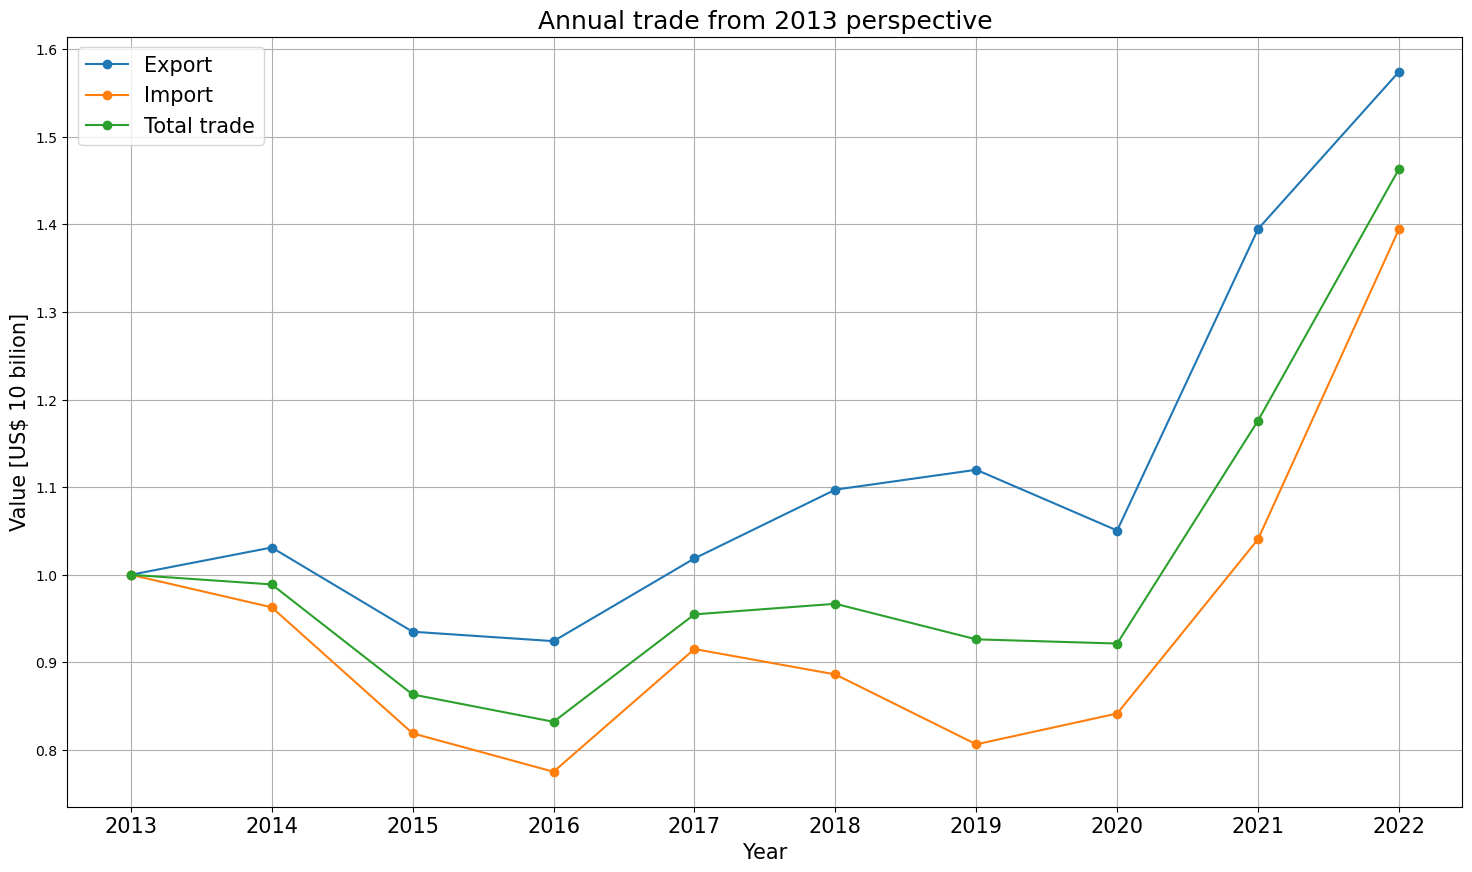

In [26]:
plt.figure(figsize = (18,10))
plt.plot(EI_f.index, EI_f['E_2013'], label = 'Export', marker='o')
plt.plot(EI_f.index, EI_f['I_2013'], label = 'Import', marker='o')
plt.plot(EI_f.index, EI_f['E+I_2013'], label = 'Total trade', marker='o')
plt.title('Annual trade from 2013 perspective', fontsize = 18)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.ylabel(ylabel = 'Value [US$ 10 bilion]', fontsize = 15)
plt.xticks(ticks = EI_f.index, fontsize = 15)
#plt.yticks(range(0, 62*10**7+1, 5*10**7), fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(zorder=0)
plt.show()

In [27]:
#make percentage change of both export and import
EI_pc = EI_f.pct_change().iloc[1:].rename(columns = {'Total_E': 'E', 'Total_I': 'I'})
EI_pc = EI_pc.rename(columns = {x: x+'_%Y/Y' for x in EI_pc.columns})
EI_pc

,E_%Y/Y,I_%Y/Y,E+I_%Y/Y,E-I_%Y/Y,E/I_%Y/Y,E_2013_%Y/Y,I_2013_%Y/Y,E+I_2013_%Y/Y
Year,,,,,,,,
2014,0.031112,-0.037115,-0.011026,-0.148017,0.070856,0.031112,-0.037115,-0.011026
2015,-0.093227,-0.149410,-0.127011,-0.259937,0.066052,-0.093227,-0.149410,-0.127011
2016,-0.011492,-0.053506,-0.036108,-0.154778,0.044389,-0.011492,-0.053506,-0.036108
2017,0.102164,0.180652,0.147320,0.401915,-0.066479,0.102164,0.180652,0.147320
2018,0.077049,-0.031681,0.012677,-0.272658,0.112287,0.077049,-0.031681,0.012677
2019,0.020681,-0.090015,-0.041985,-0.453308,0.121646,0.020681,-0.090015,-0.041985
2020,-0.061908,0.043603,-0.005172,0.690100,-0.101102,-0.061908,0.043603,-0.005172
2021,0.327620,0.236468,0.276202,-0.073537,0.073719,0.327620,0.236468,0.276202
2022,0.128690,0.340003,0.244178,1.369854,-0.157695,0.128690,0.340003,0.244178


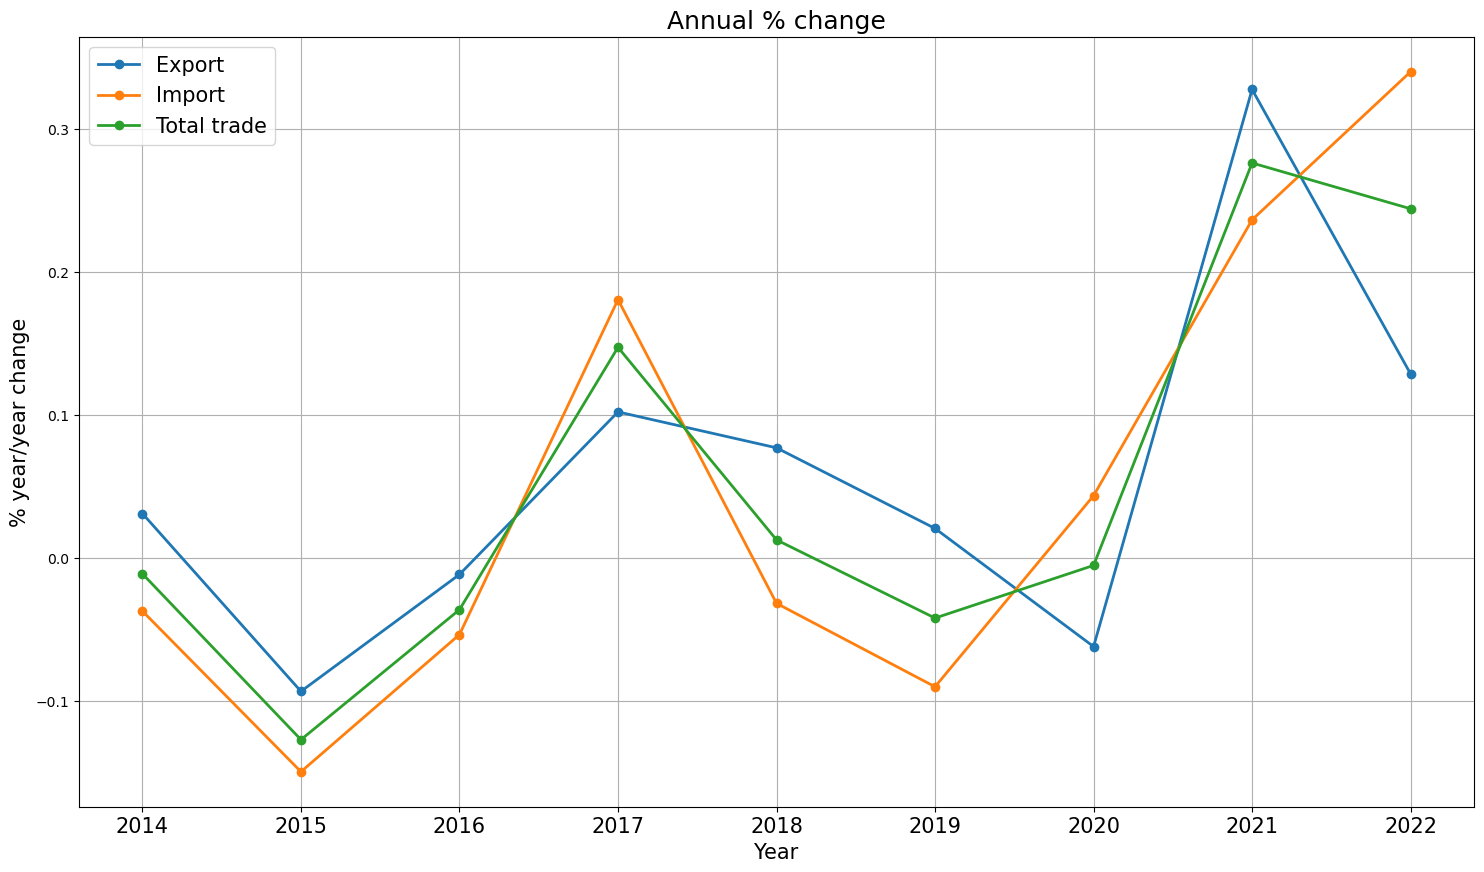

In [28]:
plt.figure(figsize = (18,10))
plt.plot(EI_pc.index, EI_pc['E_%Y/Y'], linestyle='-', marker='o', label = 'Export', linewidth = 2)
plt.plot(EI_pc.index, EI_pc['I_%Y/Y'], linestyle='-', marker='o', label = 'Import', linewidth = 2)
plt.plot(EI_pc.index, EI_pc['E+I_%Y/Y'], linestyle='-', marker='o', label = 'Total trade', linewidth = 2)
plt.grid()
plt.title('Annual % change', fontsize = 18)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.ylabel(ylabel = '% year/year change', fontsize = 15)
plt.xticks(ticks = EI_pc.index, fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Similarly to previous plots it can be seen import changes were more turbulent before 2020 comparing to export. Both export and import are increasing since 2020 but export changes seem to slow down recently. Import dynamics were still increasing since 2020. 

### Export and import comparison 

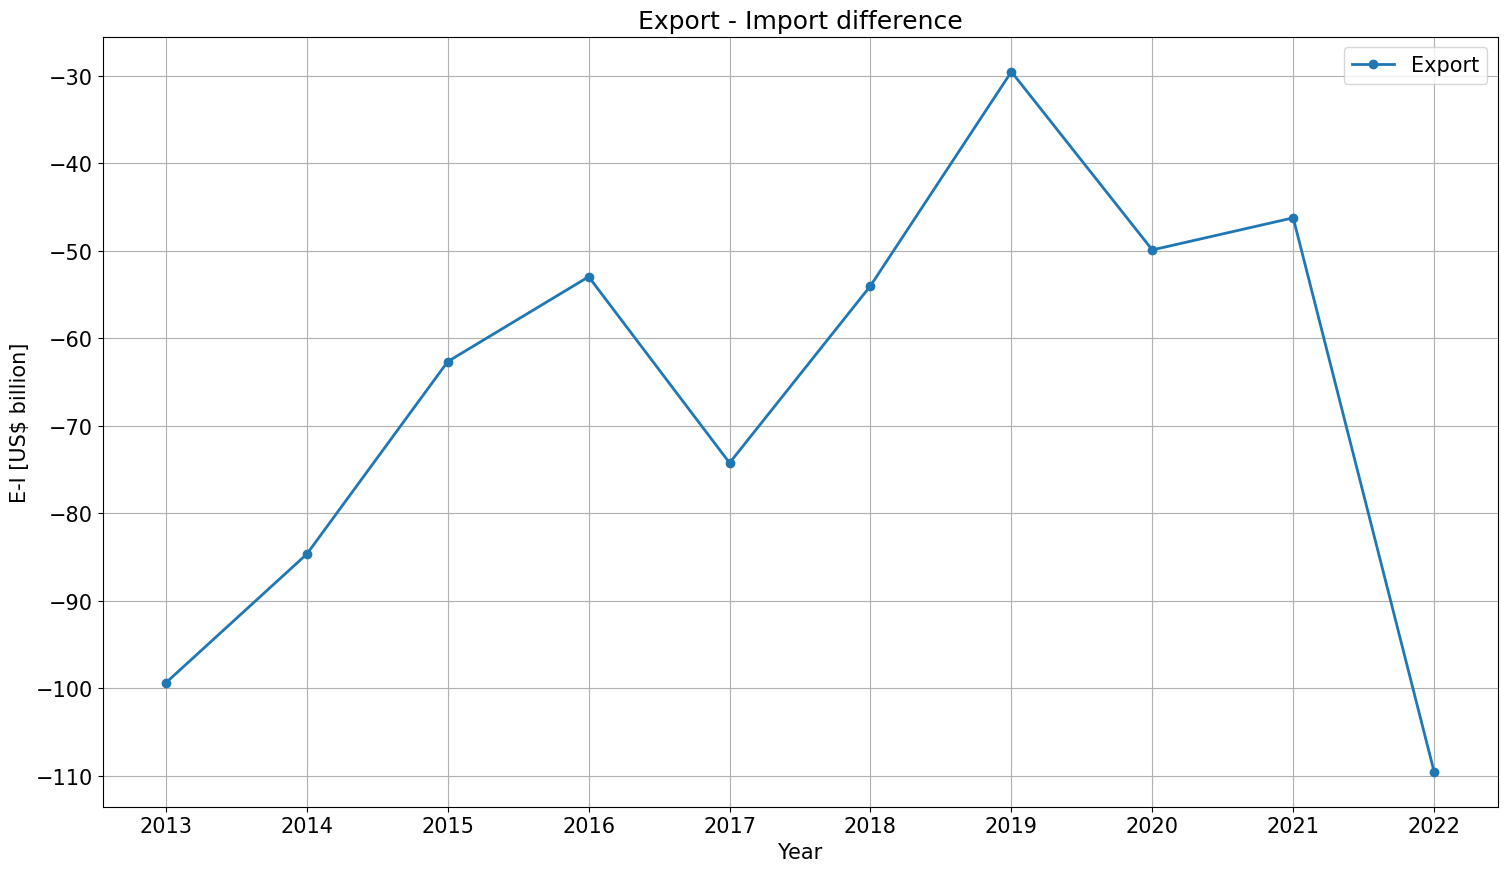

In [29]:
plt.figure(figsize = (18,10))
plt.plot(EI_f.index, EI_f['E-I']/10**6, linestyle='-', marker='o', label = 'Export', linewidth = 2)
plt.grid()
plt.title('Export - Import difference', fontsize = 18)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.ylabel(ylabel = 'E-I [US$ billion]', fontsize = 15)
plt.xticks(ticks = EI_f.index, fontsize = 15)
plt.yticks(range(-110, -20, 10), fontsize = 15)
current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:,.0f}'.format(x).replace(',',' ') for x in current_values])
plt.legend(fontsize = 15)
plt.show()

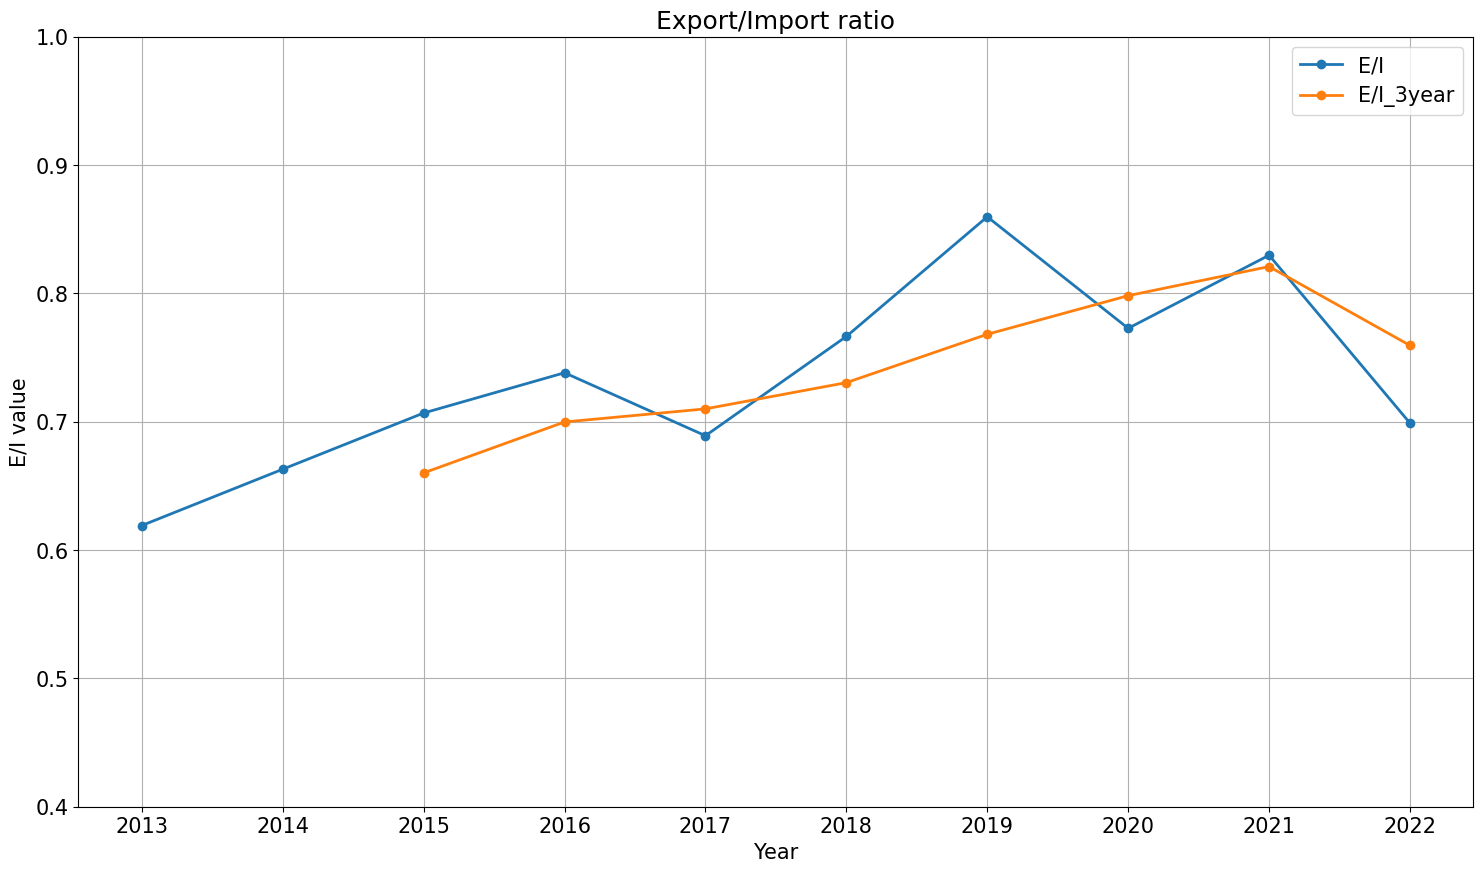

In [30]:
plt.figure(figsize = (18,10))
plt.plot(EI_f.index, EI_f['E/I'], linestyle='-', marker='o', label = 'E/I', linewidth = 2)
plt.plot(EI_f.index, EI_f['Total_E'].rolling(3).sum()/EI_f['Total_I'].rolling(3).sum(), 
         linestyle='-', marker='o', label = 'E/I_3year', linewidth = 2)
plt.grid()
plt.title('Export/Import ratio', fontsize = 18)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.ylabel(ylabel = 'E/I value', fontsize = 15)
plt.xticks(ticks = EI_f.index, fontsize = 15)
plt.yticks(np.linspace(0.4, 1, 7), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

The trade balance was always negative (export < import) thus the E/I ratio value was always lower than 1. Moreover in 2022 the trade balance reached research's historical low.<br>
E/I had stable growth in 2013-2016. 3-year E/I kept quite stable growth to 2021 but in 2022 there was the first and only drop of this indicator's value.

## 3. Last year analysis by countries

Content below might be more chaotic from previous ones due to some unclear activities.Therefore in this cell the list of activities was made. Generally before displaying data and making observations, new data preparation was need to be made. <br>The full list of actions is:<br>
<ol>
    <li>Merging import and export data from 2022</li>
    <li>Data verification, filling missing values and making new columns</li>
    <li>Sample/Head data review and making plots and observations</li>
</ol>

#### 1. Merging import and export data from 2022

Merging below could be done using:<br>
<i>select dfe.Ccode, dfe.Country, dfe.Total as E, dfi.Total as I<br>
from dfe<br>
full outer join dfi<br>
on dfe.Ccode = dfi.Ccode and dfe.Country = dfi.Country<br>
where dfe.Year = 2022 and dfi.Year = 2022;</i>

In [31]:
#merging export and import tables for 2022 year
cEI = pd.merge(dfe[dfe['Year'] == 2022].iloc[:,  1:4].rename(columns = {'Total': 'E'}),
               dfi[dfi['Year'] == 2022].iloc[:,  1:4].rename(columns = {'Total': 'I'}), 
               how = 'outer',
               on = ['Ccode', 'Country'])
cEI

,Ccode,Country,E,I
0,1,France,9.534537e+06,9.429722e+06
1,3,Netherlands,8.026561e+06,4.497260e+06
2,4,Germany,2.114274e+07,2.403295e+07
3,5,Italy,1.239636e+07,1.408227e+07
4,6,United Kingdom,1.300519e+07,5.904426e+06
...,...,...,...,...
231,813,Pitcairn,NaN,2.791000e+00
232,836,Norfolk Islands,NaN,1.480900e+01
233,839,Tokelau Islands,NaN,7.082000e+00
234,891,Antarctica,NaN,8.336000e+00


#### 2. Data verification, filling missing values and making new columns

In [32]:
#find NaN values in export or import and display those countries by 'Ccode:Country' key:value dictionary
ctest = cEI[(cEI['I'].isna()) | (cEI['E'].isna())][['Ccode', 'Country']].set_index(['Ccode']).to_dict()['Country']
ctest

{21: 'Ceuta',
 377: 'Mayotte',
 466: 'Saint Barthelemy',
 467: 'St. Vincent and Grenadines',
 475: 'Curaçao',
 479: 'Sint Maarten',
 807: 'Tuvalu',
 817: 'Tonga',
 825: 'Palau',
 894: 'French Southern Territories',
 45: 'Vatican City State',
 408: 'St Pierre and Miquelon',
 813: 'Pitcairn',
 836: 'Norfolk Islands',
 839: 'Tokelau Islands',
 891: 'Antarctica',
 892: 'Bouvet Islands'}

In [33]:
#check everything is correct with 'unjoined' countries
a = set(dfe[dfe['Year'] == 2022]['Country'])
b = set(dfi[dfi['Year'] == 2022]['Country'])
test1 = (a-b).union(b-a)
test2 = ctest.values()
print(sorted(test1) == sorted(test2))

True


In [34]:
#fill missing values with 0
cEI = cEI.fillna(0)
cEI

,Ccode,Country,E,I
0,1,France,9.534537e+06,9.429722e+06
1,3,Netherlands,8.026561e+06,4.497260e+06
2,4,Germany,2.114274e+07,2.403295e+07
3,5,Italy,1.239636e+07,1.408227e+07
4,6,United Kingdom,1.300519e+07,5.904426e+06
...,...,...,...,...
231,813,Pitcairn,0.000000e+00,2.791000e+00
232,836,Norfolk Islands,0.000000e+00,1.480900e+01
233,839,Tokelau Islands,0.000000e+00,7.082000e+00
234,891,Antarctica,0.000000e+00,8.336000e+00


In [35]:
#making new columns
cEI['E/I'] = cEI['E']/cEI['I']
cEI['E+I'] = cEI['E'] + cEI['I']
cEI = cEI.sort_values(by = 'E+I', ascending = False)
cEI = cEI.reset_index(drop = True)

#### 3. Sample/Head data review and making plots
Firstly sample or first part of data was watched (default first 5 countries using '.head()', countries sorted by Export, countries sorted by Import and few more conditions). After this review there is a visualisation, followed by reviewing top 20 trading partners.

In [36]:
cEI.head()

,Ccode,Country,E,I,E/I,E+I
0,75,Russia,9.343626e+06,5.884899e+07,0.158773,6.819261e+07
1,4,Germany,2.114274e+07,2.403295e+07,0.879740,4.517568e+07
2,720,China,3.281335e+06,4.135473e+07,0.079346,4.463607e+07
3,999,Confidential Country,9.904053e+05,3.447250e+07,0.028730,3.546291e+07
4,400,USA,1.688555e+07,1.522877e+07,1.108792,3.211432e+07


In [37]:
#check values sorted by export
cEI.sort_values(by = 'E', ascending = False)

,Ccode,Country,E,I,E/I,E+I
1,4,Germany,2.114274e+07,2.403295e+07,0.879740,4.517568e+07
4,400,USA,1.688555e+07,1.522877e+07,1.108792,3.211432e+07
10,612,Iraq,1.375054e+07,1.419235e+06,9.688695,1.516977e+07
7,6,United Kingdom,1.300519e+07,5.904426e+06,2.202617,1.890961e+07
5,5,Italy,1.239636e+07,1.408227e+07,0.880281,2.647863e+07
...,...,...,...,...,...,...
229,839,Tokelau Islands,0.000000e+00,7.082000e+00,0.000000,7.082000e+00
230,813,Pitcairn,0.000000e+00,2.791000e+00,0.000000,2.791000e+00
232,892,Bouvet Islands,0.000000e+00,1.438000e+00,0.000000,1.438000e+00
234,45,Vatican City State,0.000000e+00,7.050000e-01,0.000000,7.050000e-01


In [38]:
#check values sorted by import
cEI.sort_values(by = 'I', ascending = False)

,Ccode,Country,E,I,E/I,E+I
0,75,Russia,9.343626e+06,5.884899e+07,0.158773,6.819261e+07
2,720,China,3.281335e+06,4.135473e+07,0.079346,4.463607e+07
3,999,Confidential Country,9.904053e+05,3.447250e+07,0.028730,3.546291e+07
1,4,Germany,2.114274e+07,2.403295e+07,0.879740,4.517568e+07
8,39,Switzerland,1.334758e+06,1.533590e+07,0.087035,1.667066e+07
...,...,...,...,...,...,...
202,807,Tuvalu,5.807600e+02,0.000000e+00,inf,5.807600e+02
205,475,Curaçao,2.555160e+02,0.000000e+00,inf,2.555160e+02
206,466,Saint Barthelemy,2.322240e+02,0.000000e+00,inf,2.322240e+02
217,817,Tonga,1.000510e+02,0.000000e+00,inf,1.000510e+02


In [39]:
#check countries with export or import higher than 10 billion US$ (higher than 10**7 but the unit is US$1000)
cEI[(cEI['E'] >= 10**7) | (cEI['I'] >= 10**7)]

,Ccode,Country,E,I,E/I,E+I
0,75,Russia,9.343626e+06,5.884899e+07,0.158773,6.819261e+07
1,4,Germany,2.114274e+07,2.403295e+07,0.879740,4.517568e+07
2,720,China,3.281335e+06,4.135473e+07,0.079346,4.463607e+07
3,999,Confidential Country,9.904053e+05,3.447250e+07,0.028730,3.546291e+07
4,400,USA,1.688555e+07,1.522877e+07,1.108792,3.211432e+07
5,5,Italy,1.239636e+07,1.408227e+07,0.880281,2.647863e+07
7,6,United Kingdom,1.300519e+07,5.904426e+06,2.202617,1.890961e+07
8,39,Switzerland,1.334758e+06,1.533590e+07,0.087035,1.667066e+07
10,612,Iraq,1.375054e+07,1.419235e+06,9.688695,1.516977e+07
12,664,India,1.637414e+06,1.069711e+07,0.153071,1.233452e+07


Filtering to make proper annotations. Below one of them was presented. In SQL it could be done by this query:<br>
<i>select *<br>
from cEI<br>
where E/I < 0,2 and I > 10000000;</i>

In [40]:
cEI[(cEI['E/I'] < 0.2) & (cEI['I'] > 10**7)]

,Ccode,Country,E,I,E/I,E+I
0,75,Russia,9343625.796,5.884899e+07,0.158773,6.819261e+07
2,720,China,3281335.253,4.135473e+07,0.079346,4.463607e+07
3,999,Confidential Country,990405.340,3.447250e+07,0.028730,3.546291e+07
8,39,Switzerland,1334757.785,1.533590e+07,0.087035,1.667066e+07
12,664,India,1637413.766,1.069711e+07,0.153071,1.233452e+07


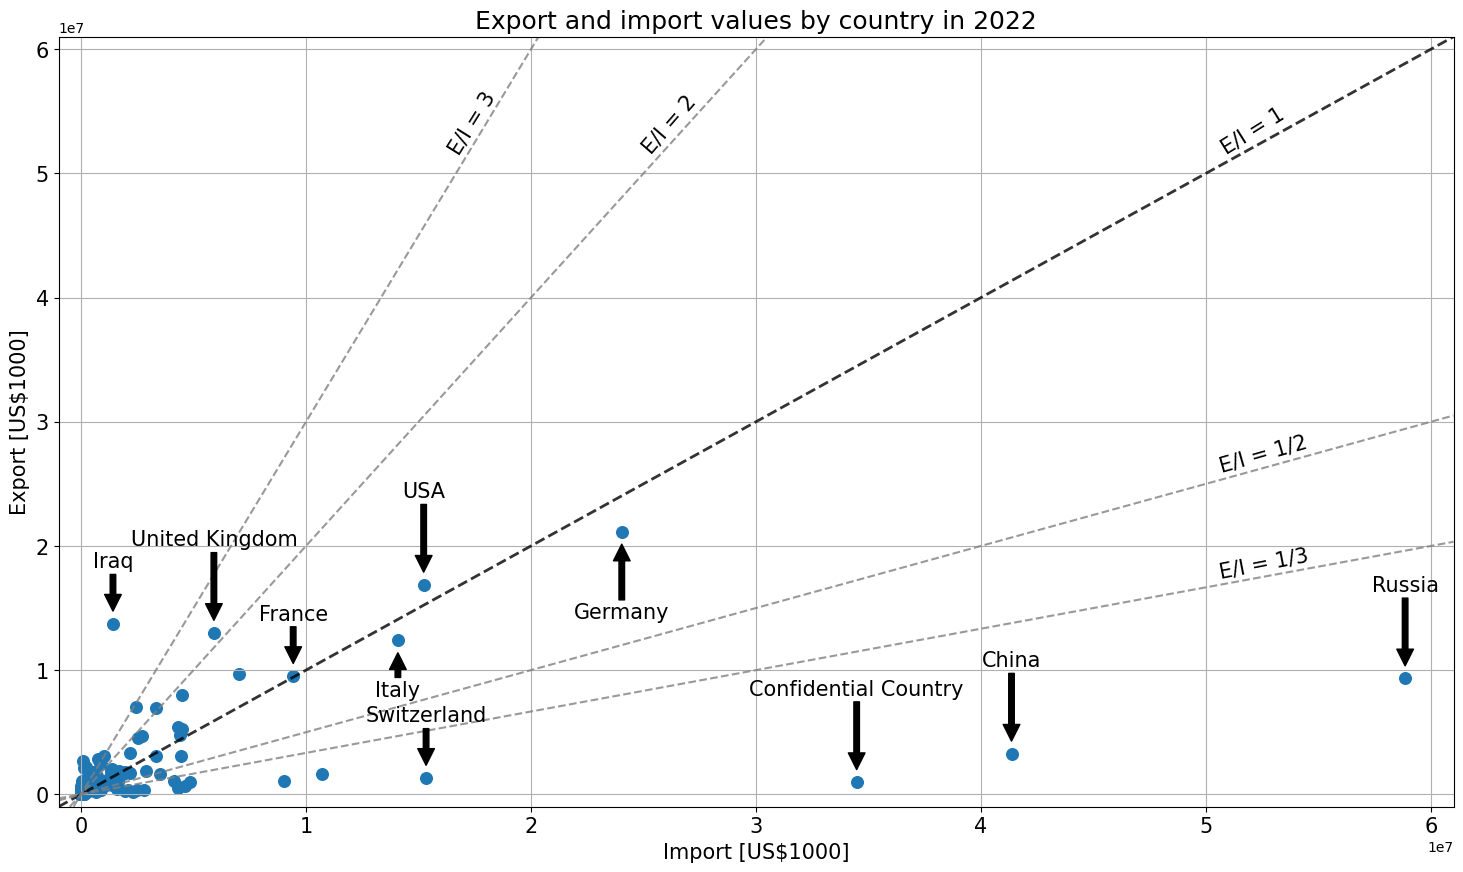

In [41]:
#scatter plot with axes
plt.figure(figsize = (18,10))
plt.scatter(x = cEI['I'], y = cEI['E'], s = 70)
plt.grid()
plt.title('Export and import values by country in 2022', fontsize = 18)
plt.xlabel(xlabel = 'Import [US$1000]', fontsize = 15)
plt.ylabel(ylabel = 'Export [US$1000]', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim([-1*10**6, 6.1*10**7])
plt.ylim([-1*10**6, 6.1*10**7])
#axes
plt.axline((0, 0), slope = 1, color = 'black', linestyle = '--', alpha = 0.8, linewidth = 2)
plt.axline((0, 0), slope = 2, color = 'gray', linestyle = '--', alpha = 0.8)
plt.axline((0, 0), slope = 0.5, color = 'gray', linestyle = '--', alpha = 0.8)
plt.axline((0, 0), slope = 3, color = 'gray', linestyle = '--', alpha = 0.8)
plt.axline((0, 0), slope = 1/3, color = 'gray', linestyle = '--', alpha = 0.8)
plt.text(x = 5.05*10**7, y = 2.6*10**7, s = 'E/I = 1/2', rotation = 16, fontsize = 15)
plt.text(x = 5.05*10**7, y = 5.16*10**7, s = 'E/I = 1', rotation = 32, fontsize = 15)
plt.text(x = 2.48*10**7, y = 5.16*10**7, s = 'E/I = 2', rotation = 49, fontsize = 15)
plt.text(x = 5.05*10**7, y = 1.74*10**7, s = 'E/I = 1/3', rotation = 11, fontsize = 15)
plt.text(x = 1.62*10**7, y = 5.16*10**7, s = 'E/I = 3', rotation = 58, fontsize = 15)
#arrows and texts
plt.annotate('Russia', xy = (cEI[cEI['Country'] == 'Russia']['I'], cEI[cEI['Country'] == 'Russia']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'Russia']['I'], cEI[cEI['Country'] == 'Russia']['E'] + 7*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('China', xy = (cEI[cEI['Country'] == 'China']['I'], cEI[cEI['Country'] == 'China']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'China']['I'], cEI[cEI['Country'] == 'China']['E'] + 7*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('Confidential Country', xy = (cEI[cEI['Country'] == 'Confidential Country']['I'], cEI[cEI['Country'] == 'Confidential Country']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'Confidential Country']['I'], cEI[cEI['Country'] == 'Confidential Country']['E'] + 7*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('Germany', xy = (cEI[cEI['Country'] == 'Germany']['I'], cEI[cEI['Country'] == 'Germany']['E'] - 10**6), 
             xytext = (cEI[cEI['Country'] == 'Germany']['I'], cEI[cEI['Country'] == 'Germany']['E'] - 7*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('Italy', xy = (cEI[cEI['Country'] == 'Italy']['I'], cEI[cEI['Country'] == 'Italy']['E'] - 10**6), 
             xytext = (cEI[cEI['Country'] == 'Italy']['I'], cEI[cEI['Country'] == 'Italy']['E'] - 4.5*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('USA', xy = (cEI[cEI['Country'] == 'USA']['I'], cEI[cEI['Country'] == 'USA']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'USA']['I'], cEI[cEI['Country'] == 'USA']['E'] + 7*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('United Kingdom', xy = (cEI[cEI['Country'] == 'United Kingdom']['I'], cEI[cEI['Country'] == 'United Kingdom']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'United Kingdom']['I'], cEI[cEI['Country'] == 'United Kingdom']['E'] + 7*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('Iraq', xy = (cEI[cEI['Country'] == 'Iraq']['I'], cEI[cEI['Country'] == 'Iraq']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'Iraq']['I'], cEI[cEI['Country'] == 'Iraq']['E'] + 4.5*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('France', xy = (cEI[cEI['Country'] == 'France']['I'], cEI[cEI['Country'] == 'France']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'France']['I'], cEI[cEI['Country'] == 'France']['E'] + 4.5*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('Switzerland', xy = (cEI[cEI['Country'] == 'Switzerland']['I'], cEI[cEI['Country'] == 'Switzerland']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'Switzerland']['I'], cEI[cEI['Country'] == 'Switzerland']['E'] + 4.5*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.show()

Lots of countries with strong influence on total trade are located below E/I = 1 line, so Türkiye buys from them more than sell. Italy, France and German-related results are relatively close to the neutral score (E/I = 1) but on the other hand import's advantage over export is clearly seen by looking at the top 3 import countries whose import values (reminder: 'import' means the value the Türkiye imported from them) are higher than any export value. Those 3 countries are: 3. Confidential Country, 2. China, 1. Russia. Moreover import seemed to be strongly dependent on those 3 countries. Germany was the 4th import partner by value and the top partner by export.<br>
All 3 top importing partners have extremely low E/I ratio (below E/I=1/3 strongly), so it looks more like one-way trade partnership.<br>
Export seemed to be less unevenly distributed due to the lack of extremely high values because for the top 4 export desinations export values are similar and next countries' (sorted by export) decrease more gradually comparing to the import perspective.


In [42]:
#cEI[(cEI['E'] > 0.9*10**7) | (cEI['I'] > 0.9*10**7)].sort_values(by = 'E/I', ascending = False)

In [43]:
#top 20 countries by total trade in 2022
top = cEI.sort_values(by = 'E+I', ascending = False).head(20)
top['%E_Total'] = 100*top['E']/cEI['E'].sum()
top['%I_Total'] = 100*top['I']/cEI['I'].sum()
top

,Ccode,Country,E,I,E/I,E+I,%E_Total,%I_Total
0,75,Russia,9.343626e+06,5.884899e+07,0.158773,6.819261e+07,3.675736,16.180153
1,4,Germany,2.114274e+07,2.403295e+07,0.879740,4.517568e+07,8.317448,6.607705
2,720,China,3.281335e+06,4.135473e+07,0.079346,4.463607e+07,1.290861,11.370220
3,999,Confidential Country,9.904053e+05,3.447250e+07,0.028730,3.546291e+07,0.389621,9.477993
4,400,USA,1.688555e+07,1.522877e+07,1.108792,3.211432e+07,6.642691,4.187053
5,5,Italy,1.239636e+07,1.408227e+07,0.880281,2.647863e+07,4.876666,3.871830
6,1,France,9.534537e+06,9.429722e+06,1.011115,1.896426e+07,3.750840,2.592642
7,6,United Kingdom,1.300519e+07,5.904426e+06,2.202617,1.890961e+07,5.116177,1.623384
8,39,Switzerland,1.334758e+06,1.533590e+07,0.087035,1.667066e+07,0.525087,4.216507
9,11,Spain,9.650335e+06,7.004021e+06,1.377828,1.665436e+07,3.796394,1.925711


In [44]:
print('% of export by top 20 countries:', top['%E_Total'].sum().round(2),
      '\n% of import by top 20 countries:',top['%I_Total'].sum().round(2))

% of export by top 20 countries: 60.79 
% of import by top 20 countries: 75.54


In [45]:
#countries with E/I < 1 from top 20 total trade value
top[top['E/I'] < 1]

,Ccode,Country,E,I,E/I,E+I,%E_Total,%I_Total
0,75,Russia,9.343626e+06,5.884899e+07,0.158773,6.819261e+07,3.675736,16.180153
1,4,Germany,2.114274e+07,2.403295e+07,0.879740,4.517568e+07,8.317448,6.607705
2,720,China,3.281335e+06,4.135473e+07,0.079346,4.463607e+07,1.290861,11.370220
3,999,Confidential Country,9.904053e+05,3.447250e+07,0.028730,3.546291e+07,0.389621,9.477993
5,5,Italy,1.239636e+07,1.408227e+07,0.880281,2.647863e+07,4.876666,3.871830
8,39,Switzerland,1.334758e+06,1.533590e+07,0.087035,1.667066e+07,0.525087,4.216507
12,664,India,1.637414e+06,1.069711e+07,0.153071,1.233452e+07,0.644151,2.941102
14,728,South Korea,1.051992e+06,9.004399e+06,0.116831,1.005639e+07,0.413848,2.475702
19,72,Ukraine,3.063797e+06,4.455399e+06,0.687659,7.519196e+06,1.205283,1.224983


Leading countries' scores review shows that Türkiye's import is strongly dependent on Russia, China and Confidential Country which have made around 37% of total turkish import. They have also very low E/I ratio which proves that those partnerships are mostly one-way oriented. Generally top 20 trading partners make over 75% of turkish import (so top 3 turkish import sources make half of top 20 trading partners' import).<br>
Top 20 trading partners make over 60% of turkish export so export in 2022 was clearly less dominated by single countries comparing to the import.<br>
It should be kept in mind we don't know Confidential Country's value is distributed among real countries officially, so the real value for any country may vary from current TURKSTAT data.